In [1]:
from data import _read_cvrp, _read_distance, create_random_cvrp
from map import Map
import pandas as pd

%load_ext autoreload
%autoreload 2


data, meta_data = _read_cvrp('sample_data/X-n5.vrp')
print(meta_data)
data

{'name': 'X-n5', 'comment': 'Generated by Ardavan Sassani (2013)', 'type': 'CVRP', 'dimension': 5, 'edge_weight_type': 'EUC_2D', 'capacity': 206, 'filepath': 'sample_data/X-n5', 'depots': ['1']}


,NODE_COORD,DEMAND,ID,IS_DEPOT
0,"(365.0, 689.0)",0,1,True
1,"(146.0, 180.0)",38,2,False
2,"(792.0, 5.0)",51,3,False
3,"(658.0, 510.0)",73,4,False
4,"(461.0, 270.0)",70,5,False


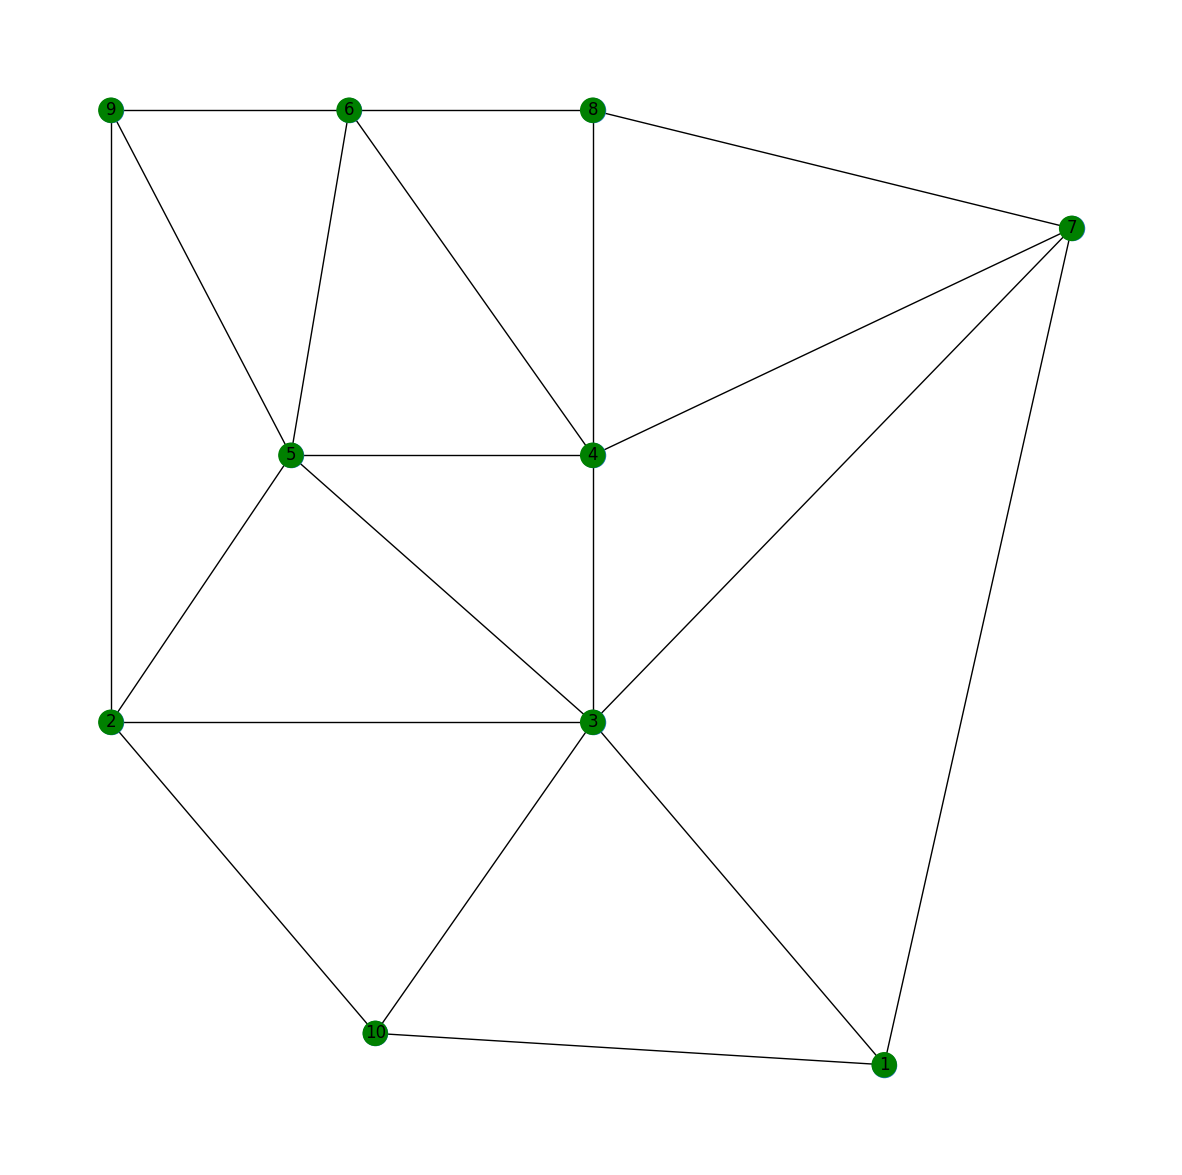

In [11]:
map = Map()
# map.import_nodes_from_file('sample_data/X-n5.vrp', 'cvrp')
# map.import_nodes_from_file('sample_data/X-n101-k25.vrp', 'cvrp')
# map.import_nodes_from_file('sample_data/X-n1001-k43.vrp', 'cvrp')
map.create_random_nodes(n=10)
map.create_net_by_voronoi()
map.draw(show_demands=False)

In [12]:
map.nodes_df

,ID,NODE_COORD,DEMAND,IS_DEPOT
0,1,"(6.530977697544422, 0.19612171100871323)",18,False
1,2,"(0.8235380698996375, 3.1498085011023456)",15,False
2,3,"(4.379549774907609, 3.1498085011023456)",54,False
3,4,"(4.379549774907609, 5.451978334670583)",17,False
4,5,"(2.152294693720883, 5.451978334670583)",99,False
5,6,"(2.5815319573285422, 8.427238582072343)",50,False
6,7,"(7.91428931453939, 7.408609122661504)",100,False
7,8,"(4.379549774907609, 8.427238582072343)",38,False
8,9,"(0.8235380698996375, 8.427238582072343)",9,False
9,10,"(2.7746138786931054, 0.46723601055878805)",15,False


In [13]:
paths = dict(map.shortest_path_matrix())
paths = pd.DataFrame.from_dict(paths).sort_index()
paths


,1,2,3,4,5,6,7,8,9,10
1,[1],"[2, 10, 1]","[3, 1]","[4, 7, 1]","[5, 3, 1]","[6, 8, 7, 1]","[7, 1]","[8, 7, 1]","[9, 2, 10, 1]","[10, 1]"
2,"[1, 10, 2]",[2],"[3, 2]","[4, 3, 2]","[5, 2]","[6, 5, 2]","[7, 3, 2]","[8, 7, 3, 2]","[9, 2]","[10, 2]"
3,"[1, 3]","[2, 3]",[3],"[4, 3]","[5, 3]","[6, 4, 3]","[7, 3]","[8, 7, 3]","[9, 2, 3]","[10, 3]"
4,"[1, 7, 4]","[2, 3, 4]","[3, 4]",[4],"[5, 4]","[6, 4]","[7, 4]","[8, 4]","[9, 6, 4]","[10, 3, 4]"
5,"[1, 3, 5]","[2, 5]","[3, 5]","[4, 5]",[5],"[6, 5]","[7, 3, 5]","[8, 6, 5]","[9, 5]","[10, 2, 5]"
6,"[1, 7, 4, 6]","[2, 9, 6]","[3, 4, 6]","[4, 6]","[5, 6]",[6],"[7, 4, 6]","[8, 6]","[9, 6]","[10, 2, 9, 6]"
7,"[1, 7]","[2, 3, 7]","[3, 7]","[4, 7]","[5, 3, 7]","[6, 8, 7]",[7],"[8, 7]","[9, 2, 3, 7]","[10, 1, 7]"
8,"[1, 7, 8]","[2, 9, 6, 8]","[3, 7, 8]","[4, 8]","[5, 6, 8]","[6, 8]","[7, 8]",[8],"[9, 6, 8]","[10, 1, 7, 8]"
9,"[1, 10, 2, 9]","[2, 9]","[3, 2, 9]","[4, 6, 9]","[5, 9]","[6, 9]","[7, 3, 2, 9]","[8, 6, 9]",[9],"[10, 2, 9]"
10,"[1, 10]","[2, 10]","[3, 10]","[4, 3, 10]","[5, 2, 10]","[6, 4, 3, 10]","[7, 1, 10]","[8, 7, 1, 10]","[9, 2, 10]",[10]


In [14]:
lengths = map.shortest_length_matrix()
lengths = pd.DataFrame.from_dict(lengths).sort_index()
lengths

,1,2,3,4,5,6,7,8,9,10
1,0.000000,7.083196,3.654163,5.956333,6.857388,9.432688,7.343945,8.931593,10.115880,3.766135
2,7.083196,0.000000,3.556012,4.885371,2.658116,5.664179,8.925518,7.462197,5.277430,3.317061
3,3.654163,3.556012,0.000000,2.302170,3.203225,5.778524,5.534597,5.277430,6.461717,3.126022
4,5.956333,4.885371,2.302170,0.000000,2.227255,3.476355,4.040147,2.975260,5.234349,5.428192
5,6.857388,2.658116,3.203225,2.227255,0.000000,3.006064,6.267402,4.804081,3.258492,5.975177
6,9.432688,5.664179,5.778524,3.476355,3.006064,0.000000,5.476603,1.798018,1.757994,8.904547
7,7.343945,8.925518,5.534597,4.040147,6.267402,5.476603,0.000000,3.678585,7.234597,8.660619
8,8.931593,7.462197,5.277430,2.975260,4.804081,1.798018,3.678585,0.000000,3.556012,8.403452
9,10.115880,5.277430,6.461717,5.234349,3.258492,1.757994,7.234597,3.556012,0.000000,8.594491
10,3.766135,3.317061,3.126022,5.428192,5.975177,8.904547,8.660619,8.403452,8.594491,0.000000
